                                      Final Project
    
Project Overview:
    
The purpuse of this project is to see the relationship between the GDP and the unemployment rate in U.S. In this project, we have time series data of the GDP and the unemployment rate for the U.S. According to the theory, the GDP and the unemployment rate has a negative relationship. We will use linear regression analysis to test whether the GDP will influence the unemployment rate. 

Project Structure:
    
This projects consist of three parts starting by providing the data and explaining where the data comes from and how to access it.
The second part will focus on providing summary statistics showing the relationship between GDP and unemployment rate while giving visuals of the statistics to help illustrate the project.
The third part of the project will have a hypothesis which will be compared with trends in previous scholarship. To test the hypothesis a linear regression will be preformed and the results will be stated. Finally, there will be a discussion of the test results and whether or not it follows previous scholarship.

Data Report: 

The data for this project comes from Federal Reserve Economics Data webside (FRED). FRED provides quartertly data on the U.S. GDP and unemploment rate from 1950. It also provides quarterly data on Personal Consumption Expenditures, Gross Private Domestic Investment, Government total expenditures, and Net Exports of Goods and Services, which is realtes to how to calculate GDP. The data can be accessed at https://fred.stlouisfed.org. 

Key Variables: 

The two key variables in this project are GDP and unemployment rate. FRED defines GDP by county as the following: "a measure of the market value of final goods and services produced within a county area in a particular period. While other measures of county economies rely mainly on labor market data, these statistics incorporate multiple data sources that capture trends in labor, revenue, and value of production. As a result, the capital-intensive industries are captured more fully than when measured solely by labor data."

FRED defines unemployment rate as the following: "Unemployed persons are all persons who had no employment during the reference week, were available for work, except for temporary illness, and had made specific efforts to find employment some time during the 4 week-period ending with the reference week. ... The unemployment rate is the unemployed percent of the civilian labor force (100 times (unemployed/civilian labor force))."

In [10]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [11]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [12]:
data.columns=['DATE','UNRATE']
data.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [13]:
#Summary Statistics for Unemployment Rate
data.describe()

,UNRATE
count,875.000000
mean,5.765371
std,1.707381
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


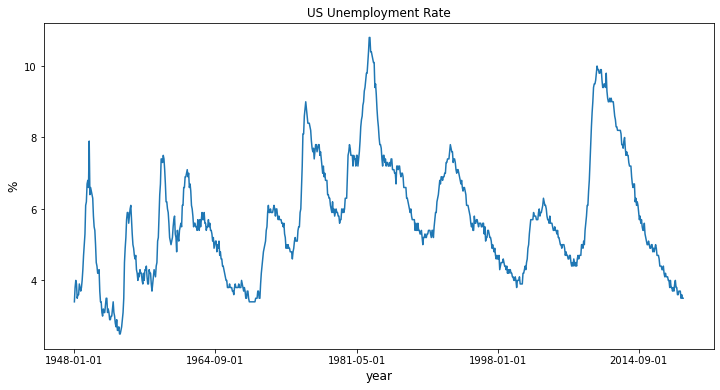

In [14]:
#Graphing the Unemployment Rate
data1=data.set_index('DATE')
ax = data1['1948':'2020'].plot(title='US Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [15]:
#Access Data
url2 = 'http://research.stlouisfed.org/fred2/series/USALORSGPNOSTSAM/downloaddata/USALORSGPNOSTSAM.csv'
data2 = pd.read_csv(url2, parse_dates=True)
data2.head()

,DATE,VALUE
0,1960-01-01,100.994363
1,1960-02-01,101.004509
2,1960-03-01,100.929737
3,1960-04-01,100.772335
4,1960-05-01,100.550950


In [16]:
data2.columns=['DATE', 'GDP']
data2.head()

,DATE,GDP
0,1960-01-01,100.994363
1,1960-02-01,101.004509
2,1960-03-01,100.929737
3,1960-04-01,100.772335
4,1960-05-01,100.550950


In [17]:
#Summary Statistics for GDP
data2.describe()

,GDP
count,728.000000
mean,99.978666
std,1.303097
min,90.538285
25%,99.433310
50%,99.990773
75%,100.765380
max,102.907915


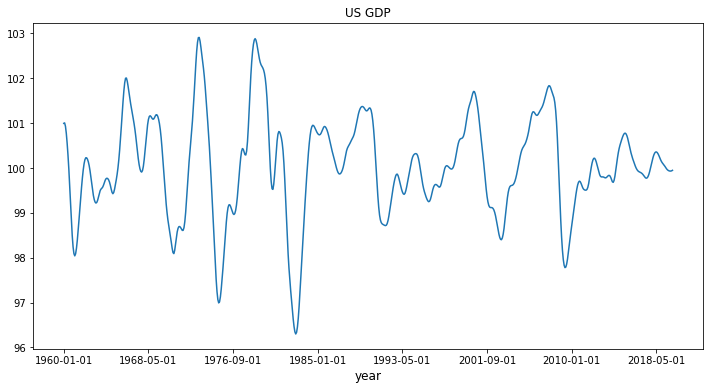

In [18]:
#Graphing GDP
data2_1=data2.set_index('DATE')
ax = data2_1['1960':'2020'].plot(title='US GDP', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [19]:
data_merge=pd.merge(data, data2, how='inner', on= 'DATE', left_on = None, right_on = None,
                   left_index = False, right_index = False, sort=True,
                   suffixes = ('_x', '_y'), copy = True, indicator = False,
                   validate = None)

In [20]:
data_merge.head()

,DATE,UNRATE,GDP
0,1960-01-01,5.2,100.994363
1,1960-02-01,4.8,101.004509
2,1960-03-01,5.4,100.929737
3,1960-04-01,5.2,100.772335
4,1960-05-01,5.1,100.550950


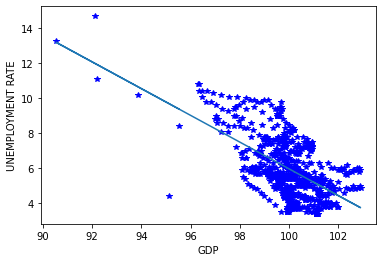

In [21]:
from numpy.polynomial.polynomial import polyfit
fig,ax = plt.subplots()
ax.plot(data_merge['GDP'],data_merge['UNRATE'],'b*')
ax.set_xlabel('GDP')
ax.set_ylabel('UNEMPLOYMENT RATE')
b,m=polyfit(data_merge['GDP'],data_merge['UNRATE'],1)
ax.plot(data_merge['GDP'], b+m*data_merge['GDP'], '-')

In [22]:
m

-0.7640724469809373

Regression Analysis

We want to esablish a relationship between the Unemployment rate and the GDP. We will run a linear regression.

In [23]:
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['GDP'], data_merge['UNRATE'])
gradient, intercept, std_err, p_value

(-0.7640724469809367,
 82.38572415551148,
 0.03859440816093313,
 4.38340191252009e-70)

From the regression results, we established a negative relationship between unemployment rate and GDP, with the results being statistically significant. 

'...Tell Story of the results of why the relationship is like this...'